# Importing standard libraries

In [2]:
%pylab inline
import numpy as np
np.random.seed(2016)
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import sys, os

Populating the interactive namespace from numpy and matplotlib


# Importing sklearn libraries

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Tensorflow libraries

In [5]:
import tensorflow as tf

# Keras Libraries for Neural Networks

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator, array_to_img
split_random_state = 7
split = .8

Using TensorFlow backend.


# Play with Kaggle Dataset

In [7]:
#train_data = pd.read_csv('train.csv')
#train_data.shape
#train_data.head()
test_data = pd.read_csv('test.csv')
test_data.shape
#test_data.head()
test_data.describe()


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


# Training dataset  

In [8]:

def load_numeric_training(standardize=True):
    #read data from CSV file
    data = pd.read_csv('train.csv')
    ID = data.pop('id')
    y = data.pop('species')
    y = LabelEncoder().fit(y).transform(y)
     #standard the data by setting the mean to o and std to 1
    X = StandardScaler().fit(data).transform(data) if standardize else data.values
    return ID,X,y



In [12]:
ID, X, y= load_numeric_training()
ID.shape
y = to_categorical(y)
y.shape

(990, 99)

# Test dataset from 

In [9]:
def load_numeric_test(standardize=True):
    #read data from CSV file
    test = pd.read_csv('test.csv')
    ID = test.pop('id')
    test = StandardScaler().fit(test).transform(test) if standardize else test.values
    return ID, test
ID, test =  load_numeric_test();
ID = to_categorical(ID)
ID.shape

(594, 1584)

In [14]:
#ss = load_numeric_test()

# Resize image

In [15]:
def resize_img(img, max_dim=96):
    """
    Resize the image so that the maximum side is of size max_dim
    Returns a new image of the right size. We do this standarisation 
    process for ease of future computation.
    """
    # Get the axis with the larger dimension
    # Return the largest item in an iterable or the largest of two or more arguments.
    # You pass it  zeros and one, 0 will give you the height, 1 will give..
    # .. you the width, max then determines what axis is the largest. 
    
    max_ax = max((0, 1), key=lambda i: img.size[i])
    # Scale both axes so the image's largest dimension is max_dim
    scale = max_dim / float(img.size[max_ax])
    # The below code just makes sure that the proportional dimensions remain the same. 
    return img.resize((int(img.size[0] * scale), int(img.size[1] * scale)))

In [16]:
#le = preprocessing.LabelEncoder()
#le.fit([1, 2, 3, 4])
#le.classes_
#le.transform([1, 2, 3, 4])
#ID, X_num_tr, y = load_numeric_training()
#ID[10]
#resize_img(load_img(os.path.join('images/', str(ID[0]) + '.jpg'), grayscale=True), max_dim=96)

# Load image data

In [17]:
def load_image_data(ids, max_dim=96, center=True):
    """
    Takes as input an array of image ids and loads the images as numpy
    arrays with the images resized so the longest side is max-dim length.
    If center is True, then will place the image in the center of
    the output array, otherwise it will be placed at the top-left corner.
    """
    
    # Initialize and empty output array, 
    X = np.empty((len(ids), max_dim, max_dim, 1))
    
    # Emumerate adds a counter to the itterable, thus in this scenario we...
    # ... have the real id and a number of the id.
    
    for i, idee in enumerate(ids):
        # Turn all images into an array, the textual information connect with the image name
        # ... via the variable id. 
        x = resize_img(load_img(os.path.join('images/', str(idee) + '.jpg'), grayscale=True), max_dim=max_dim)
        # img to array is an existing method part of keras.
        # img has been resized but it has to put into array format. 
        x = img_to_array(x)
        # Get the corners of the bounding box for the image
        length = x.shape[0]
        width = x.shape[1]
        if center:
            # have to put into integer for shape to understand. 
            # This is the code to position it to center
            h1 = int((max_dim - length) / 2)
            h2 = h1 + length
            w1 = int((max_dim - width) / 2)
            w2 = w1 + width
        else:
            # Now it will be left in the hoek
            h1, w1 = 0, 0
            h2, w2 = (length, width)
        # Insert into image matrix
        X[i, h1:h2, w1:w2, 0:1] = x
        # X[i, 0:1, h1:h2, w1:w2] = x  # uncomment this
    # Scale the array values so they are between 0 and 1
    # It then rounds to a certain amount of decimals. 
    """
     Grayscale images (as photographs) intended for visual 
     display (both on screen and printed) are commonly stored 
     with 8 bits per sampled pixel, which allows 256 different
     intensities
     
     The binary representations assume that 0 is black and the
     maximum value (255 at 8 bpp, 65,535 at 16 bpp, etc.) is white
    """
    
    return np.around(X / 255.0)

# Cross validation on training data

In [18]:
def load_train_data(split=split, random_state=None):
    """
    Loads the pre-extracted feature and image training data and
    splits them into training and cross-validation. Returns one 
    tuple for the training data and one for the validation
    data. Each tuple is in the order pre-extracted features, images,
    and labels.
    """
    
    # Load the pre-extracted features
    ID, X_num_tr, y = load_numeric_training()
    # Load the image data
    X_img_tr = load_image_data(ID)
    # Split them into validation and cross-validation
    sss = StratifiedShuffleSplit(n_splits=1, train_size=split, random_state=random_state)
    train_ind, test_ind = next(sss.split(X_num_tr, y))
    X_num_val, X_img_val, y_val = X_num_tr[test_ind], X_img_tr[test_ind], y[test_ind]
    X_num_tr, X_img_tr, y_tr = X_num_tr[train_ind], X_img_tr[train_ind], y[train_ind]
   
    return (X_num_tr, X_img_tr, y_tr), (X_num_val, X_img_val, y_val)

In [19]:
print('Loading the training data...')
(X_num_tr, X_img_tr, y_tr), (X_num_val, X_img_val, y_val) = load_train_data(random_state=split_random_state)
y_tr_cat = to_categorical(y_tr)
y_val_cat = to_categorical(y_val)
print('Training data loaded!')



Loading the training data...
Training data loaded!


In [20]:
print(X_num_val.shape)
print(X_img_val.shape)
print(y_val.shape)
print(X_num_tr.shape)
print(X_img_tr.shape)
print(y_tr.shape)

(99, 192)
(99, 96, 96, 1)
(99,)
(792, 192)
(792, 96, 96, 1)
(792,)


In [21]:
def load_test_data():
    """
    Loads the pre-extracted feature and image test data.
    Returns a tuple in the order ids, pre-extracted features,
    and images.
    """
    # Load the pre-extracted features
    ID, X_num_te = load_numeric_test()
    # Load the image data
    X_img_te = load_image_data(ID)
    return ID, X_num_te, X_img_te

# Data Augmentation

In [22]:
#------------------------------------------------------- Data augmentation

# This code inludes random image rotation and zoom, important generalisability operations.

from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator, array_to_img

# A little hacky piece of code to get access to the indices of the images...
# ...the data augmenter is working with.

class ImageDataGenerator2(ImageDataGenerator):
    def flow(self, X, y=None, batch_size=32, shuffle=True, seed=None,
             save_to_dir=None, save_prefix='', save_format='jpeg'):
        return NumpyArrayIterator2(
            X, y, self,
            batch_size=batch_size, shuffle=shuffle, seed=seed,
            save_to_dir=save_to_dir, save_prefix=save_prefix, save_format=save_format)


class NumpyArrayIterator2(NumpyArrayIterator):
    def next(self):
        # see http://anandology.com/blog/using-iterators-and-generators/
        with self.lock:
            # We changed index_array to self.index_array
            self.index_array, current_index, current_batch_size = next(self.index_generator)
        # The transformation of images is not under thread lock so it can be done in parallel
        batch_x = np.zeros(tuple([current_batch_size] + list(self.x.shape)[1:]))
        for i, j in enumerate(self.index_array):
            x = self.x[j]
            x = self.image_data_generator.random_transform(x.astype('float32'))
            x = self.image_data_generator.standardize(x)
            batch_x[i] = x
        if self.save_to_dir:
            for i in range(current_batch_size):
                img = array_to_img(batch_x[i], scale=True)
                fname = '{prefix}_{index}_{hash}.{format}'.format(prefix=self.save_prefix,
                                                                  index=current_index + i,
                                                                  hash=np.random.randint(1e4),
                                                                  format=self.save_format)
                img.save(os.path.join(self.save_to_dir, fname))
        if self.y is None:
            return batch_x
        batch_y = self.y[self.index_array]
        return batch_x, batch_y

print('Creating Data Augmenter...')
imgen = ImageDataGenerator2(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
imgen_train = imgen.flow(X_img_tr, y_tr_cat, seed=np.random.randint(1, 10000))
print('Finished making data augmenter...')



Creating Data Augmenter...
Finished making data augmenter...


# Model Creation

In [23]:
#---------------------------Combining the Image CNN with the Pre-Extracted Features MLP¶

from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten, Input, merge


def combined_model():

    # Define the image input
    image = Input(shape=(96, 96, 1), name='image')
    # Pass it through the first convolutional layer
    x = Convolution2D(8, 5, 5, input_shape=(96, 96, 1), border_mode='same')(image)
    x = (Activation('relu'))(x)
    x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)

    # Now through the second convolutional layer
    x = (Convolution2D(32, 5, 5, border_mode='same'))(x)
    x = (Activation('relu'))(x)
    x = (MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))(x)

    # Flatten our array
    x = Flatten()(x)
    # Define the pre-extracted feature input
    numerical = Input(shape=(192,), name='numerical')
    # Concatenate the output of our convnet with our pre-extracted feature input
    concatenated = merge([x, numerical], mode='concat')

    # Add a fully connected layer just like in a normal MLP
    x = Dense(100, activation='relu')(concatenated)
    x = Dropout(.5)(x)

    # Get the final output
    out = Dense(99, activation='softmax')(x)
    # How we create models with the Functional API
    model = Model(input=[image, numerical], output=out)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model

print('Creating the model...')
model = combined_model()
print('Model created!')


Creating the model...


C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), input_shape=(96, 96, 1..., padding="same")`
  if sys.path[0] == '':
C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\legacy\layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
C:\Users\100641313\AppData\Local\Con

Model created!


# Train Model

In [23]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


def combined_generator(imgen, X):
    """
    A generator to train our keras neural network. It
    takes the image augmenter generator and the array
    of the pre-extracted features.
    It yields a minibatch and will run indefinitely
    """
    while True:
        for i in range(X.shape[0]):
            # Get the image batch and labels
            batch_img, batch_y = next(imgen)
            # This is where that change to the source code we
            # made will come in handy. We can now access the indicies
            # of the images that imgen gave us.
            x = X[imgen.index_array]
            yield [batch_img, x], batch_y

# autosave best Model
best_model_file = "leafnet.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)

print('Training model...')
history = model.fit_generator(combined_generator(imgen_train, X_num_tr),
                              samples_per_epoch=X_num_tr.shape[0],
                              nb_epoch=100,
                              validation_data=([X_img_val, X_num_val], y_val_cat),
                              nb_val_samples=X_num_val.shape[0],
                              verbose=1,
                              callbacks=[best_model])

print('Loading the best model...')
model = load_model(best_model_file)
print('Best Model loaded!')
# I keyboard interupted this model when I thought it ran long enough.

Training model...


C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=([array([[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=792, epochs=100, validation_steps=99)`


Epoch 1/100
792/792 [==============================] - 229s - loss: 0.8880 - acc: 0.7862 - val_loss: 0.0462 - val_acc: 0.9798
Epoch 2/100
792/792 [==============================] - 233s - loss: 0.0623 - acc: 0.9836 - val_loss: 0.0171 - val_acc: 0.9899
Epoch 3/100
792/792 [==============================] - 239s - loss: 0.0262 - acc: 0.9930 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 4/100
792/792 [==============================] - 242s - loss: 0.0151 - acc: 0.9957 - val_loss: 0.0137 - val_acc: 0.9899
Epoch 5/100
792/792 [==============================] - 243s - loss: 0.0096 - acc: 0.9970 - val_loss: 0.0117 - val_acc: 0.9899
Epoch 6/100
792/792 [==============================] - 242s - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0161 - val_acc: 0.9899
Epoch 7/100
792/792 [==============================] - 243s - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 8/100
792/792 [==============================] - 244s - loss: 0.0063 - acc: 0.9976 - val_loss: 0.0215 - val_acc:

792/792 [==============================] - 272s - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 67/100
792/792 [==============================] - 260s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 68/100
792/792 [==============================] - 255s - loss: 0.0123 - acc: 0.9983 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 69/100
792/792 [==============================] - 282s - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 70/100
792/792 [==============================] - 290s - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0151 - val_acc: 0.9899
Epoch 71/100
792/792 [==============================] - 265s - loss: 0.0045 - acc: 0.9989 - val_loss: 0.0102 - val_acc: 0.9899
Epoch 72/100
792/792 [==============================] - 265s - loss: 0.0128 - acc: 0.9985 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 73/100
792/792 [==============================] - 263s - loss: 0.0037 - acc: 0.9989 - val_loss: 0.0143 - val_acc: 0.98

C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\engine\topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


Best Model loaded!


In [33]:
model_fn = 'leafnet.h5'
hostory = load_model(model_fn)
#history = model.history
print('val_acc: ',max(history.history['val_acc']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['acc']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\engine\topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


AttributeError: 'Model' object has no attribute 'history'

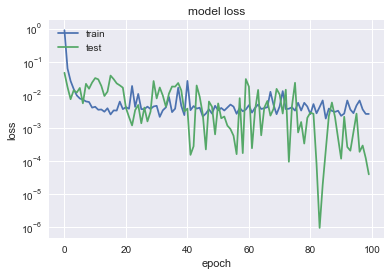

In [26]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

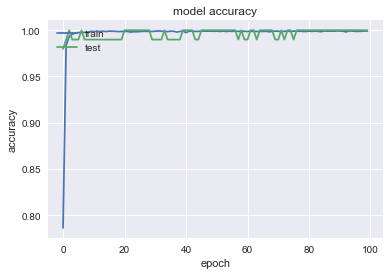

In [27]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Get the names of the column headers
LABELS = sorted(pd.read_csv("train.csv").species.unique())

index, test, X_img_te = load_test_data()

yPred_proba = model.predict([X_img_te, test])

# Converting the test predictions in a dataframe as depicted by sample submission
yPred = pd.DataFrame(yPred_proba,index=index,columns=LABELS)

print('Creating and writing submission...')
fp = open('submit.csv', 'w')
fp.write(yPred.to_csv())
print('Finished writing submission')
# Display the submission
yPred.tail()

Creating and writing submission...
Finished writing submission


,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
1576,0.000000e+00,1.000000e+00,2.877529e-35,0.000000e+00,1.720206e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.980666e-33,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,8.924488e-26
1577,2.876829e-33,1.640388e-32,0.000000e+00,7.696343e-29,1.480663e-38,0.000000e+00,9.277454e-33,9.178005e-27,1.198145e-15,0.000000e+00,...,2.010435e-33,0.000000e+00,4.214315e-17,8.199048e-32,1.903163e-14,1.228189e-20,6.287867e-32,0.0,1.625917e-38,4.710042e-32
1579,5.343847e-29,0.000000e+00,0.000000e+00,0.000000e+00,4.089142e-33,6.137633e-35,0.000000e+00,0.000000e+00,0.000000e+00,5.892090e-27,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1580,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.468535e-25,0.000000e+00,8.007949e-34,0.000000e+00,0.000000e+00,0.000000e+00,...,2.331627e-35,1.309706e-36,0.000000e+00,1.082371e-25,0.000000e+00,0.000000e+00,8.685652e-34,0.0,0.000000e+00,0.000000e+00
1583,0.000000e+00,7.650414e-37,0.000000e+00,0.000000e+00,0.000000e+00,2.747484e-29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00


# Visualization

C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\engine\topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


Top 3 Predicitons:
	Acer_Mono: 1.0
	Magnolia_Salicifolia: 7.25413e-22
	Ilex_Cornuta: 3.5505e-25

Actual: Acer_Mono


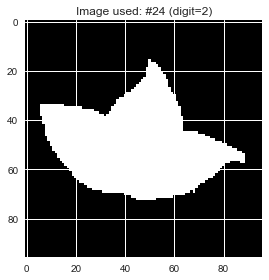

Visualizing Convolutions Layer 0


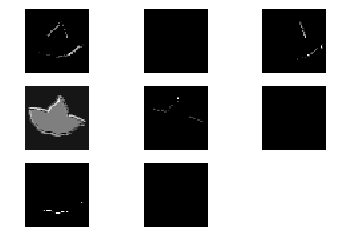

Visualizing Convolutions Layer 1


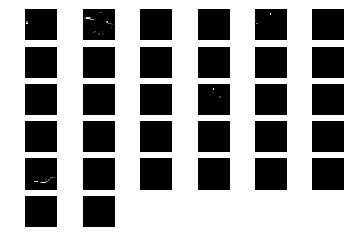

Top 3 Predicitons:
	Quercus_Afares: 1.0
	Quercus_Trojana: 3.72187e-21
	Prunus_Avium: 2.01649e-22

Actual: Quercus_Afares


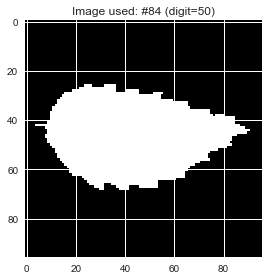

Visualizing Convolutions Layer 0


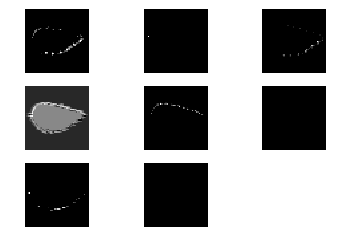

Visualizing Convolutions Layer 1


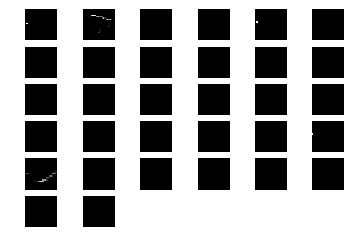

Top 3 Predicitons:
	Quercus_Chrysolepis: 1.0
	Populus_Adenopoda: 1.09575e-28
	Magnolia_Salicifolia: 2.40316e-30

Actual: Quercus_Chrysolepis


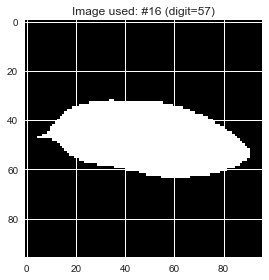

Visualizing Convolutions Layer 0


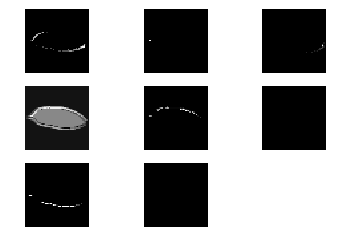

Visualizing Convolutions Layer 1


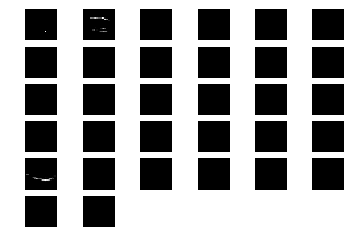

In [27]:
from math import sqrt

import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten, Input, merge
from keras.models import load_model

NUM_LEAVES = 3
model_fn = 'leafnet.h5'

# Function by gcalmettes from http://stackoverflow.com/questions/11159436/multiple-figures-in-a-single-window
def plot_figures(figures, nrows = 1, ncols=1, titles=False):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(sorted(figures.keys(), key=lambda s: int(s[3:]))):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        if titles:
            axeslist.ravel()[ind].set_title(title)

    for ind in range(nrows*ncols):
        axeslist.ravel()[ind].set_axis_off()

    if titles:
        plt.tight_layout()
    plt.show()


def get_dim(num):
    """
    Simple function to get the dimensions of a square-ish shape for plotting
    num images
    """

    s = sqrt(num)
    if round(s) < s:
        return (int(s), int(s)+1)
    else:
        return (int(s)+1, int(s)+1)

# Load the best model
model = load_model(model_fn)

# Get the convolutional layers
conv_layers = [layer for layer in model.layers if isinstance(layer, MaxPooling2D)]

# Pick random images to visualize
imgs_to_visualize = np.random.choice(np.arange(0, len(X_img_val)), NUM_LEAVES)

# Use a keras function to extract the conv layer data
convout_func = K.function([model.layers[0].input, K.learning_phase()], [layer.output for layer in conv_layers])
conv_imgs_filts = convout_func([X_img_val[imgs_to_visualize], 0])
# Also get the prediction so we know what we predicted
predictions = model.predict([X_img_val[imgs_to_visualize], X_num_val[imgs_to_visualize]])

imshow = plt.imshow #alias
# Loop through each image disply relevant info
for img_count, img_to_visualize in enumerate(imgs_to_visualize):

    # Get top 3 predictions
    top3_ind = predictions[img_count].argsort()[-3:]
    top3_species = np.array(LABELS)[top3_ind]
    top3_preds = predictions[img_count][top3_ind]

    # Get the actual leaf species
    actual = LABELS[y_val[img_to_visualize]]

    # Display the top 3 predictions and the actual species
    print("Top 3 Predicitons:")
    for i in range(2, -1, -1):
        print("\t%s: %s" % (top3_species[i], top3_preds[i]))
    print("\nActual: %s" % actual)

    # Show the original image
    plt.title("Image used: #%d (digit=%d)" % (img_to_visualize, y_val[img_to_visualize]))
    # For Theano users comment the line below and
    imshow(X_img_val[img_to_visualize][:, :, 0], cmap='gray')
    # imshow(X_img_val[img_to_visualize][0], cmap='gray') # uncomment this
    plt.tight_layout()
    plt.show()

    # Plot the filter images
    for i, conv_imgs_filt in enumerate(conv_imgs_filts):
        conv_img_filt = conv_imgs_filt[img_count]
        print("Visualizing Convolutions Layer %d" % i)
        # Get it ready for the plot_figures function
        # For Theano users comment the line below and
        fig_dict = {'flt{0}'.format(i): conv_img_filt[:, :, i] for i in range(conv_img_filt.shape[-1])}
        # fig_dict = {'flt{0}'.format(i): conv_img_filt[i] for i in range(conv_img_filt.shape[-1])} # uncomment this
        plot_figures(fig_dict, *get_dim(len(fig_dict)))

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
LabelEncoder().fit([1, 2, 2, 6]).transform([1, 2, 2, 6])
StandardScaler().fit([1, 2, 2, 1000]).transform([1, 2, 2, 1000])

C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([-0.57889218, -0.57657893, -0.57657893,  1.73205004])

In [51]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
l = StandardScaler().fit(data)
print(l)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [3]:
# Get the names of the column headers
LABELS = sorted(pd.read_csv("train.csv").species.unique())

index, test, X_img_te = load_test_data()

yPred_proba = model.predict([X_img_te])

# Converting the test predictions in a dataframe as depicted by sample submission
yPred = pd.DataFrame(yPred_proba,index=index,columns=LABELS)

print('Creating and writing submission...')
fp = open('submit2.csv', 'w')
fp.write(yPred.to_csv())
print('Finished writing submission')
# Display the submission
yPred.head()
print(X_img_te.shape)
print(test.shape)

NameError: name 'load_test_data' is not defined